In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers


C:\Users\Asus\AppData\Local\Temp\ipykernel_20072\7998789.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
batch_size = 100
img_height = 300
img_width = 300


In [4]:
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '../Dataset/Accident Detection From CCTV Footage/data/train/',
    image_size= (img_height, img_width),
    batch_size=batch_size

)

testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '../Dataset/Accident Detection From CCTV Footage/data/test/',
    image_size= (img_height, img_width),
    batch_size=batch_size)

validation_ds =  tf.keras.preprocessing.image_dataset_from_directory(
 '../Dataset/Accident Detection From CCTV Footage/data/val/',
    image_size= (img_height, img_width),
    batch_size=batch_size)

Found 791 files belonging to 2 classes.


Found 100 files belonging to 2 classes.
Found 98 files belonging to 2 classes.


In [5]:
class_names = training_ds.class_names

print(class_names)

['Accident', 'Non Accident']


In [6]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
training_ds = training_ds.cache().prefetch(buffer_size=AUTOTUNE)
testing_ds = testing_ds.cache().prefetch(buffer_size=AUTOTUNE)

img_shape = (img_height, img_width, 3)

In [7]:
base_model = tf.keras.applications.MobileNetV2(input_shape=img_shape,
                                               include_top=False,
                                               weights='imagenet')

base_model.trainable = False

model = tf.keras.Sequential([
    base_model,
    layers.Conv2D(32, 3, activation='relu'),
    layers.Conv2D(64, 3, activation='relu'),
    layers.Conv2D(128, 3, activation='relu'),
    layers.Flatten(),
    layers.Dense(len(class_names), activation= 'softmax')
])

In [8]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
history = model.fit(training_ds, validation_data = validation_ds, epochs = 20)

Epoch 1/20


8/8 [==============================] - 56s 4s/step - loss: 0.7371 - accuracy: 0.5980 - val_loss: 0.5960 - val_accuracy: 0.7347
Epoch 2/20
3/8 [==========>...................] - ETA: 15s - loss: 0.5981 - accuracy: 0.7567

In [ ]:
model.save("AccidentDetectionModel.h5")

c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


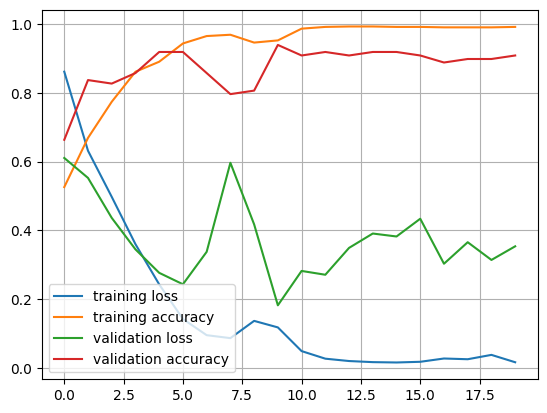

In [ ]:
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.grid(True)
plt.legend()


plt.plot(history.history['val_loss'], label = 'validation loss')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.grid(True)
plt.legend()

4/4 [==============================] - 3s 688ms/step
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


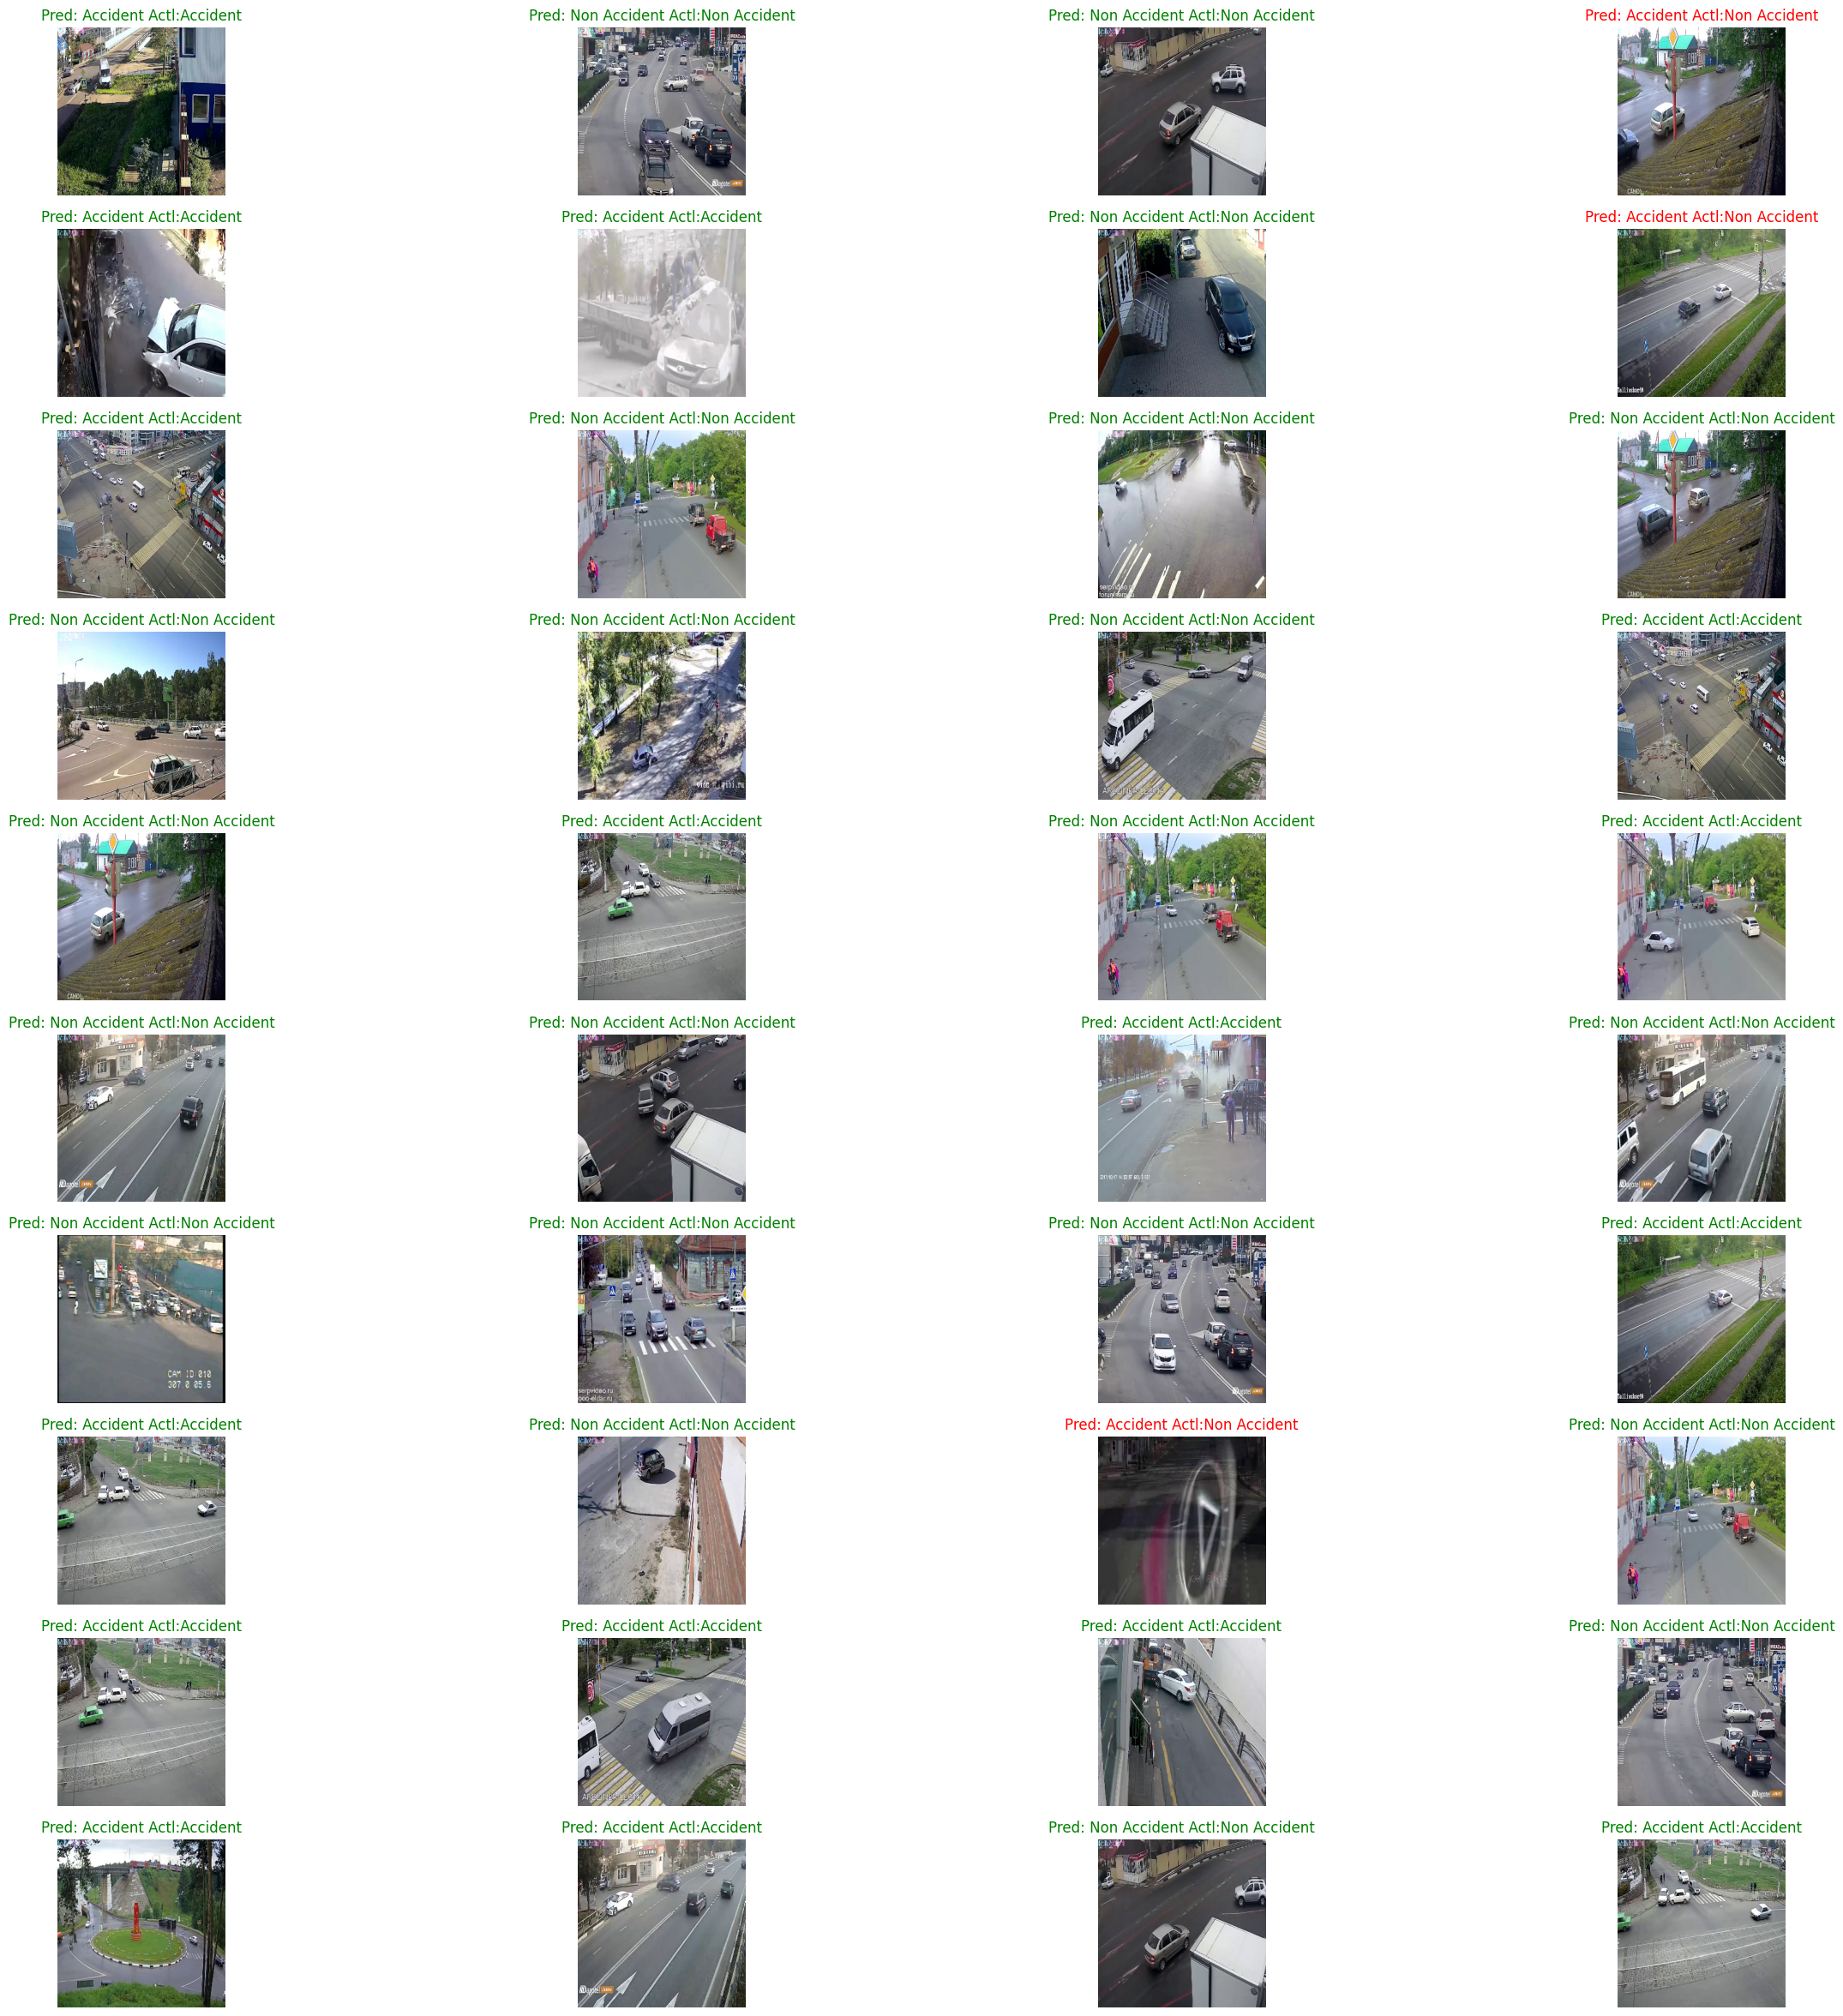

In [ ]:
AccuracyVector = []
plt.figure(figsize=(30, 30))
for images, labels in testing_ds.take(1):
    predictions = model.predict(images)
    predlabel = []
    prdlbl = []

    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))

    AccuracyVector = np.array(prdlbl) == labels
    for i in range(40):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        if (predlabel[i] == class_names[labels[i]]):
          plt.title('Pred: '+ predlabel[i]+' Actl:'+class_names[labels[i]], color = "green")
        else:
          plt.title('Pred: '+ predlabel[i]+' Actl:'+class_names[labels[i]], color = "red")
        plt.axis('off')
        plt.grid(True)

from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
print(class_names)

['Accident', 'Non Accident']


In [ ]:
def predict_frame(img):
    img_array = tf.keras.utils.img_to_array(img)
    img_batch = np.expand_dims(img_array, axis=0)
    prediction=(model.predict(img_batch) < 0.5).astype("int32")
    if(prediction[0][0]==0):
        return("Accident Detected")
    else:
        return("No Accident")

In [ ]:
import cv2
import tensorflow as tf

image = []
label = []
c = 1
cap = cv2.VideoCapture('/PBL2_project/Dataset/Accident Footages From CCTV/videoplayback (online-video-cutter.com).mp4')
while True:
    grabbed, frame = cap.read()
    if not grabbed:  # Check if frame is None (end of video)
        break
    
    if c % 30 == 0:
        print(c)
        resized_frame = tf.keras.preprocessing.image.smart_resize(frame, (img_height, img_width), interpolation='bilinear')
        image.append(frame)
        label.append(predict_frame(resized_frame))
        if len(image) == 75:
            break
    c += 1

cap.release()


In [ ]:
print(len(label))  # Check the length of the label list

if len(label) > 7:
    print(label[7])
else:
    print("Label list does not have enough elements to access index 7")

if len(image) > 7:
    plt.imshow(image[7])
    plt.show()
else:
    print("Image list does not have enough elements to access index 7")


0
Label list does not have enough elements to access index 7
Image list does not have enough elements to access index 7
